In [1]:
# First calling the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os

In [4]:
os.chdir("E:/Data Science/PYTHON/Training Files Python/Time Series Analysis/fivethirtyeight-births")

In [5]:
f_birth = pd.read_csv("US_births_2000-2014_SSA.csv", parse_dates=[4])

In [6]:
f_birth.head()

,year,month,date_of_month,day_of_week,Date,births
0,2000,1,1,6,2000-01-01,9083
1,2000,1,2,7,2000-01-02,8006
2,2000,1,3,1,2000-01-03,11363
3,2000,1,4,2,2000-01-04,13032
4,2000,1,5,3,2000-01-05,12558


In [7]:
cols = ["year","month","date_of_month","day_of_week"]

In [8]:
f_birth.drop(cols, axis=1, inplace=True)

In [9]:
f_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 2 columns):
Date      5479 non-null datetime64[ns]
births    5479 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 85.7 KB


In [10]:
f_birth.describe()

,births
count,5479.000000
mean,11350.068261
std,2325.821049
min,5728.000000
25%,8740.000000
50%,12343.000000
75%,13082.000000
max,16081.000000


In [11]:
f_birth.set_index('Date',inplace=True)

In [12]:
f_birth.head()

,births
Date,
2000-01-01,9083
2000-01-02,8006
2000-01-03,11363
2000-01-04,13032
2000-01-05,12558


In [13]:
f_birth = f_birth.sort_values('Date')

In [14]:
f_birth.tail()

,births
Date,
2014-12-27,8656
2014-12-28,7724
2014-12-29,12811
2014-12-30,13634
2014-12-31,11990


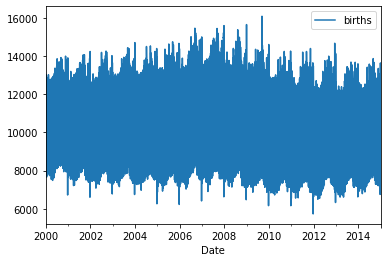

In [15]:
f_birth.plot()

In [16]:
y = f_birth['births'].resample('MS').mean()

In [17]:
type(y)

pandas.core.series.Series

In [18]:
y['2002':'2003']

Date
2002-01-01    10886.193548
2002-02-01    11068.214286
2002-03-01    10882.225806
2002-04-01    11009.633333
2002-05-01    11124.225806
2002-06-01    11114.400000
2002-07-01    11740.645161
2002-08-01    11819.645161
2002-09-01    11856.700000
2002-10-01    11378.645161
2002-11-01    10845.966667
2002-12-01    11026.548387
2003-01-01    10843.967742
2003-02-01    11171.035714
2003-03-01    11050.774194
2003-04-01    11189.700000
2003-05-01    11365.000000
2003-06-01    11429.466667
2003-07-01    11943.096774
2003-08-01    11820.032258
2003-09-01    12210.700000
2003-10-01    11633.354839
2003-11-01    10879.600000
2003-12-01    11311.096774
Freq: MS, Name: births, dtype: float64

# Visualize the data

In [19]:
# Decomposition > Trend, Seasonality, and Noise

In [20]:
import statsmodels.api as sm

In [21]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

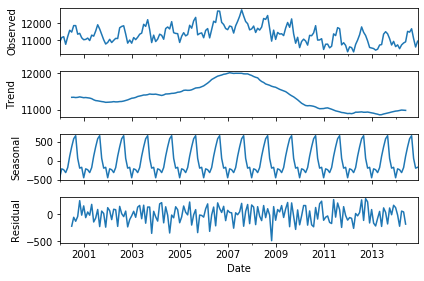

In [22]:
decomposition.plot()
plt.show()

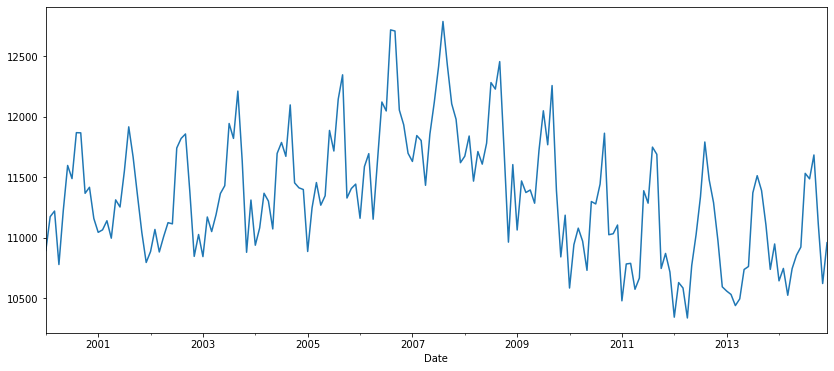

In [23]:
y.plot(figsize=(14,6))
plt.show()

# Now we will check the stationery of the data

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
y = pd.DataFrame(y)

In [26]:
type(y)

pandas.core.frame.DataFrame

In [27]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2000-01-01 to 2014-12-01
Freq: MS
Data columns (total 1 columns):
births    180 non-null float64
dtypes: float64(1)
memory usage: 7.8 KB


In [28]:
y.head()

,births
Date,
2000-01-01,10894.806452
2000-02-01,11174.000000
2000-03-01,11220.129032
2000-04-01,10778.566667
2000-05-01,11224.193548


In [29]:
y.births = y.births.round(decimals=0)

In [30]:
y.head()

,births
Date,
2000-01-01,10895.0
2000-02-01,11174.0
2000-03-01,11220.0
2000-04-01,10779.0
2000-05-01,11224.0


In [31]:
test_result = adfuller(y['births'])

In [32]:
# H0: It is non stationery
# H1: It is stationery
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test statistic', 'p-value','#Lag Used','Number of observations used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationery")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery")

In [33]:
adfuller_test(y['births'])

ADF test statistic : -1.402630317288912
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery
p-value : 0.5810144637269111
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery
#Lag Used : 14
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery
Number of observations used : 165
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery


In [34]:
# Differencing : to make data stationery,data is seasonal so difference of data should be 12

In [35]:
y['birth first difference'] = y['births']-y['births'].shift(1)

In [36]:
y['seasonal first difference'] = y['births']-y['births'].shift(12)

In [37]:
y.head(14)

,births,birth first difference,seasonal first difference
Date,,,
2000-01-01,10895.0,NaN,NaN
2000-02-01,11174.0,279.0,NaN
2000-03-01,11220.0,46.0,NaN
2000-04-01,10779.0,-441.0,NaN
2000-05-01,11224.0,445.0,NaN
2000-06-01,11597.0,373.0,NaN
2000-07-01,11488.0,-109.0,NaN
2000-08-01,11868.0,380.0,NaN
2000-09-01,11866.0,-2.0,NaN


In [38]:
# again test dicky fuller test
adfuller_test(y['seasonal first difference'].dropna())

ADF test statistic : -1.483279616225538
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery
p-value : 0.5417658642957327
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery
#Lag Used : 13
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery
Number of observations used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery


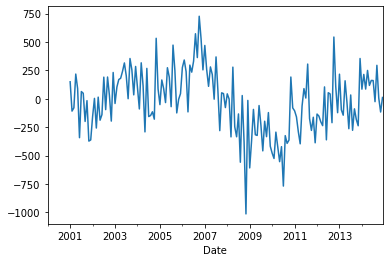

In [39]:
y['seasonal first difference'].plot()

In [40]:
adfuller_test(y['birth first difference'].dropna())

ADF test statistic : -2.6072725392289233
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery
p-value : 0.09150347797621405
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery
#Lag Used : 13
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery
Number of observations used : 165
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationery


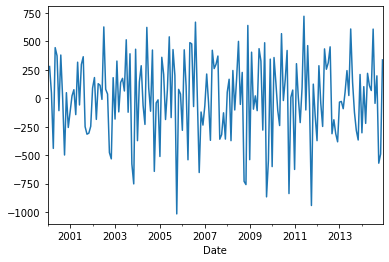

In [41]:
y['birth first difference'].plot()

In [42]:
# Auto Regressive Model: Identifing the value of p,d,q

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

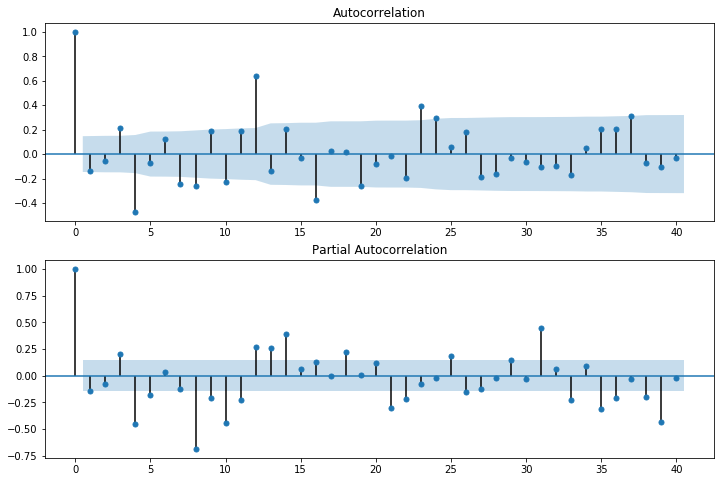

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y['birth first difference'].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y['birth first difference'].dropna(), lags=40, ax=ax2)

In [45]:
# for non-seasonal data
# p =1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model = ARIMA(y['births'], order=(1,1,1))
model_fit = model.fit()

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.births   No. Observations:                  179
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1293.132
Method:                       css-mle   S.D. of innovations            331.295
Date:                Thu, 30 Apr 2020   AIC                           2594.265
Time:                        11:51:32   BIC                           2607.014
Sample:                    02-01-2000   HQIC                          2599.434
                         - 12-01-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5819      4.658     -0.340      0.735     -10.712       7.548
ar.L1.D.births     0.6447      0.071      9.126      0.000       0.506       0.783
ma.L1.D.births    -0.9386      0.029    -32.296      0.000      -0.996      -0.882
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5511           +0.0000j            1.5511            0.0000
MA.1            1.0654           +0.0000j            1.0654            0.0000
-----------------------------------------------------------------------------
"""

In [48]:
# apply for SARIMAX
model = sm.tsa.statespace.SARIMAX(y['births'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

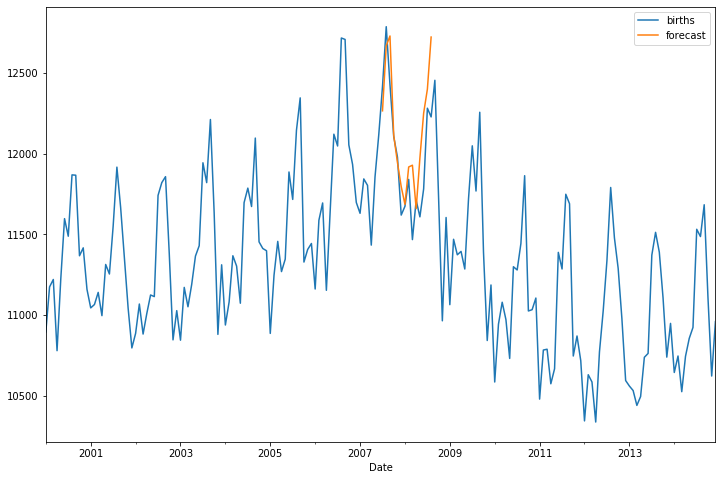

In [49]:
y['forecast']=results.predict(start=90, end=103, dynamic=True)
y[['births','forecast']].plot(figsize=(12,8))

In [50]:
# for future prediction
from pandas.tseries.offsets import DateOffset
future_dates = [y.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [51]:
future_dates_df=pd.DataFrame(index=future_dates[1:], columns=y.columns)

In [52]:
future_dates_df.tail()

,births,birth first difference,seasonal first difference,forecast
2016-07-01,NaN,NaN,NaN,NaN
2016-08-01,NaN,NaN,NaN,NaN
2016-09-01,NaN,NaN,NaN,NaN
2016-10-01,NaN,NaN,NaN,NaN
2016-11-01,NaN,NaN,NaN,NaN


In [53]:
future_df = pd.concat([y,future_dates_df])

In [56]:
future_df.shape

(203, 4)

In [61]:
future_df.tail()

,births,birth first difference,seasonal first difference,forecast
2016-07-01,NaN,NaN,NaN,NaN
2016-08-01,NaN,NaN,NaN,NaN
2016-09-01,NaN,NaN,NaN,NaN
2016-10-01,NaN,NaN,NaN,NaN
2016-11-01,NaN,NaN,NaN,NaN


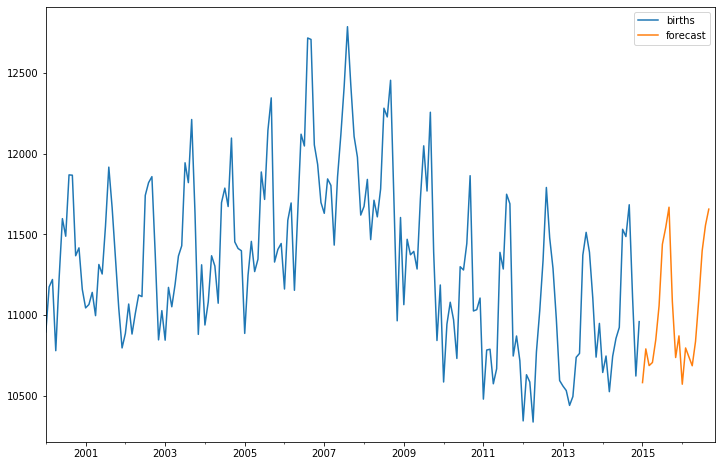

In [62]:
future_df['forecast']=results.predict(start=180, end=200, dynamic=True)
future_df[['births','forecast']].plot(figsize=(12,8))